In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
Univ=pd.read_csv("Universities_Clustering.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


# preprocessing

In [4]:
# Preprocessing
# choosing to Standardize or Normalize the data wont make a difference.

In [5]:
# NORMALIZING.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #MinMaxScaler scales(Transformes) all the numerical values in data to values between 0 and 1
# Univ_scaled = scaler.fit_transform(Univ.iloc[:,1:])
# the abv code will just give us output in terms of array and not a proper table, so first we need to make sure o convert it into a data frame.
Univ_scaled = pd.DataFrame(scaler.fit_transform(Univ.iloc[:,1:]))# we r ignoriong first column i.e. column "0" as it is a categorical data (not a numerical column).
Univ_scaled

,0,1,2,3,4,5
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [6]:
# or we can just define a function to normalize the data.
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [7]:
df_norm = norm_func(Univ.iloc[:,1:])
df_norm
# we get same output as 1st method

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


# dendrogram

In [8]:
# Next step after preprocessing (Normalization) is making a dendrogram.

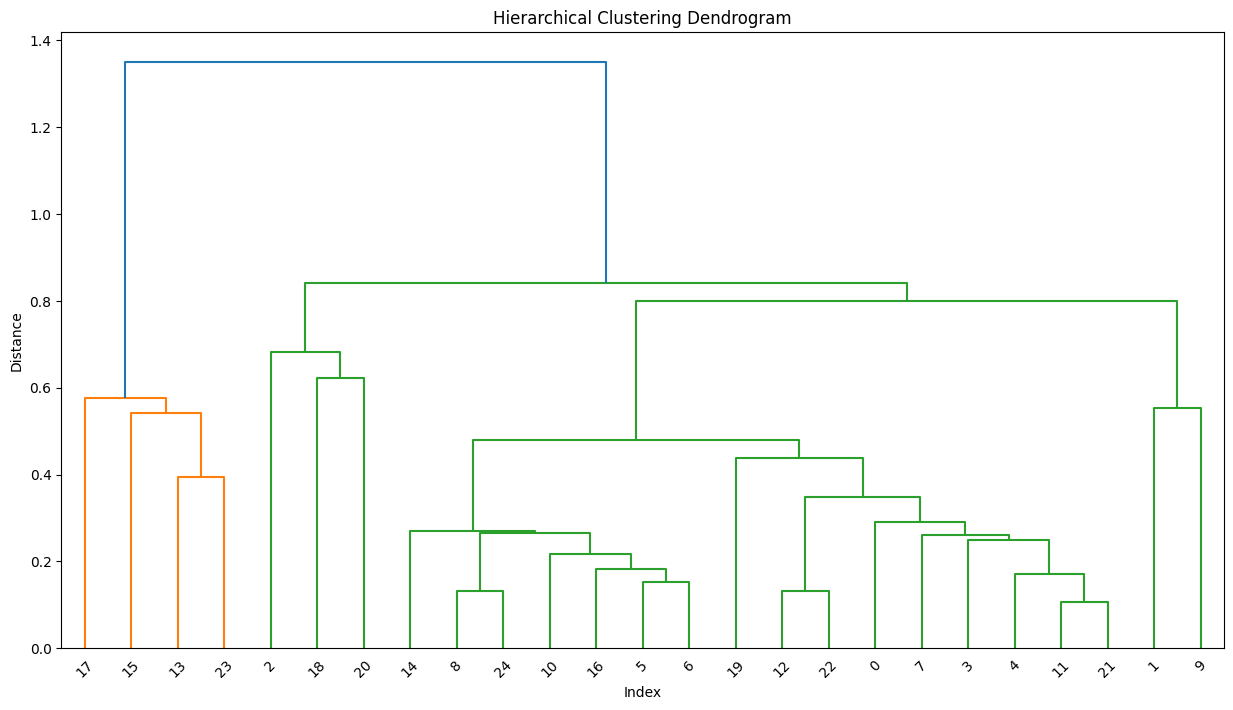

In [16]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creatinG a dendrogram.
# p=np.array(df_norm)
# this abv code is for converting into a numpy array format.
z= linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15,8))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(
    z
  ,
    #leaf_rotation=6.,                            # rotates the x axis lables
    #leaf_font_size=15                           # font size for the x axis labels
    )
plt.show()

In [18]:
#here we can see tht there are 5 clusters.
#this info will be used in creating the model below.

In [23]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")
h_complete= AgglomerativeClustering(n_clusters=5, linkage="average", metric="euclidean").fit(df_norm)
# this says tht we want to 'create 5 clusters' of our 'df_norm data' using 'avegarge linkages' and 'euclidean distace as metric'.


#now lets create cluster labels(i.e. numbering the clusters)
cluster_labels=pd.Series(h_complete.labels_)#labelling (numbering) our clusters.
cluster_labels

,0
0,3
1,2
2,4
3,3
4,3
5,3
6,3
7,3
8,3
9,2


In [25]:
# creating a new column called cluster lable in our University data set.
Univ['cluster']=cluster_labels
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [28]:
Univ.iloc[:,1:].groupby(Univ.cluster).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
cluster,,,,,,,
0,1210.0000,80.00,54.0,16.500,15305.000,81.500,0.0
1,1061.5000,38.75,70.0,19.250,9953.000,71.750,1.0
2,1360.0000,87.50,34.5,6.500,61133.000,84.000,2.0
3,1313.4375,85.00,29.0,11.625,29186.625,92.375,3.0
4,1260.0000,62.00,59.0,9.000,25026.000,72.000,4.0


In [35]:
data=Univ[(Univ.cluster==0)]
data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
18,UCBerkeley,1240,95,40,17,15140,78,0
20,UMichigan,1180,65,68,16,15470,85,0


In [36]:
data=Univ[(Univ.cluster==1)]
data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
17,TexasA&M,1075,49,67,25,8704,67,1
23,UWisconsin,1085,40,69,15,11857,71,1


In [32]:
data=Univ[(Univ.cluster==2)]
data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
1,CalTech,1415,100,25,6,63575,81,2
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [33]:
data=Univ[(Univ.cluster==3)]
data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,3
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,3
10,MIT,1380,94,30,10,34870,91,3
11,Northwestern,1260,85,39,11,28052,89,3
12,NotreDame,1255,81,42,13,15122,94,3


In [34]:
data=Univ[(Univ.cluster==4)]
data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
2,CMU,1260,62,59,9,25026,72,4


In [39]:
# As mentioned before, we can standardize data instead of normalizing it.
# This is how it would work.
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
Univ_scaled1 = pd.DataFrame(scaler1.fit_transform(Univ.iloc[:,1:7]))
Univ_scaled1

,0,1,2,3,4,5
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587
5,0.692848,0.657519,-0.838130,-0.682530,0.337780,0.932982
6,0.457378,0.710037,-0.475975,-0.180670,0.296955,0.932982
7,-0.107751,-0.130243,-0.786394,-0.180670,-0.513817,0.594945
8,1.257977,0.762555,-1.303758,-0.431600,0.858743,1.158339
9,0.363190,-0.077726,0.248335,-1.435321,2.214818,0.031550


In [ ]:
# Rest of the steps for model building as same s we have done for Normalizing method.